# Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

In [256]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
#importing all the neccesary libraries

In [257]:
train_df=pd.read_excel('Data_Train.xlsx')
test_df=pd.read_excel('Test_set.xlsx')
#importing test and train file

In [258]:
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [259]:
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [260]:
train_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [261]:
test_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [262]:
train_df.shape,test_df.shape

((10683, 11), (2671, 10))

In [263]:
train_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [264]:
test_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [265]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [266]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [267]:
big_df = train_df.append(test_df)

In [268]:
big_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [269]:
big_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270.0
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087.0
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625.0


In [270]:
big_df.tail(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2661,Jet Airways,27/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:10,04:25 29 Mar,33h 15m,2 stops,No info,NaN
2662,Air India,21/05/2019,Mumbai,Hyderabad,BOM → HYD,13:55,15:25,1h 30m,non-stop,No info,NaN
2663,GoAir,12/05/2019,Kolkata,Banglore,CCU → BOM → BLR,23:30,07:45 13 May,8h 15m,1 stop,No info,NaN
2664,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,15:15,01:30 16 Jun,10h 15m,1 stop,No info,NaN
2665,SpiceJet,21/06/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 22 Jun,1h 30m,non-stop,No check-in baggage included,NaN
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [271]:
big_df['Price'].fillna(value=big_df['Price'].mean(), inplace= True)

In [272]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

<AxesSubplot:>

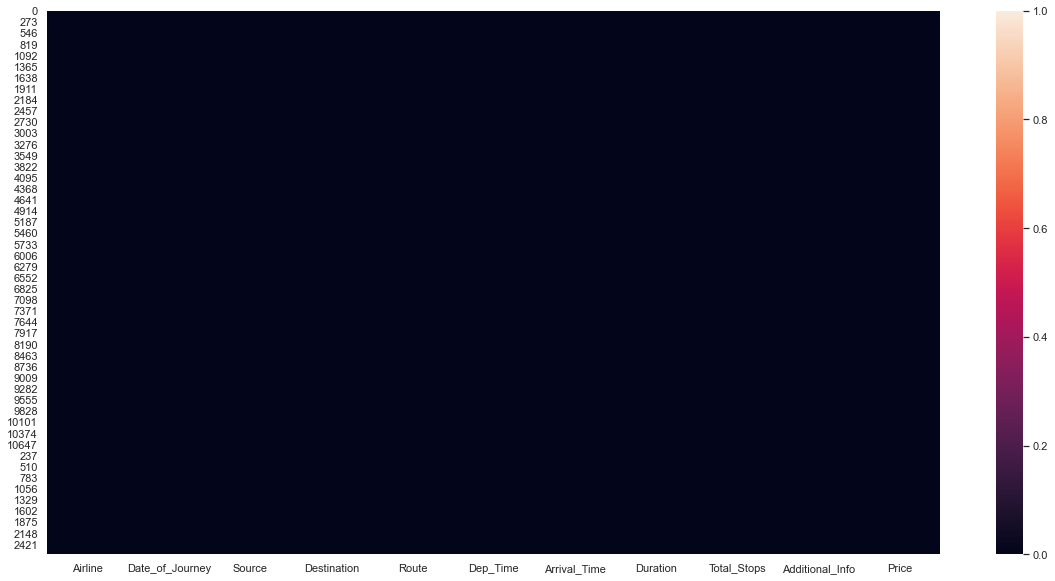

In [273]:
sn.heatmap(big_df.isnull())

In [274]:
big_df[big_df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [275]:
big_df['Route'].mode()

0    DEL → BOM → COK
dtype: object

In [276]:
big_df['Total_Stops'].mode()

0    1 stop
dtype: object

In [277]:
#inserting the most repeated route column value in null valued row
big_df.loc[9039,'Route']='DEL → BOM → COK'
big_df.loc[9039,'Total_Stops']='1 stop'

In [278]:
big_df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

# Visualisation

<AxesSubplot:xlabel='Airline', ylabel='count'>

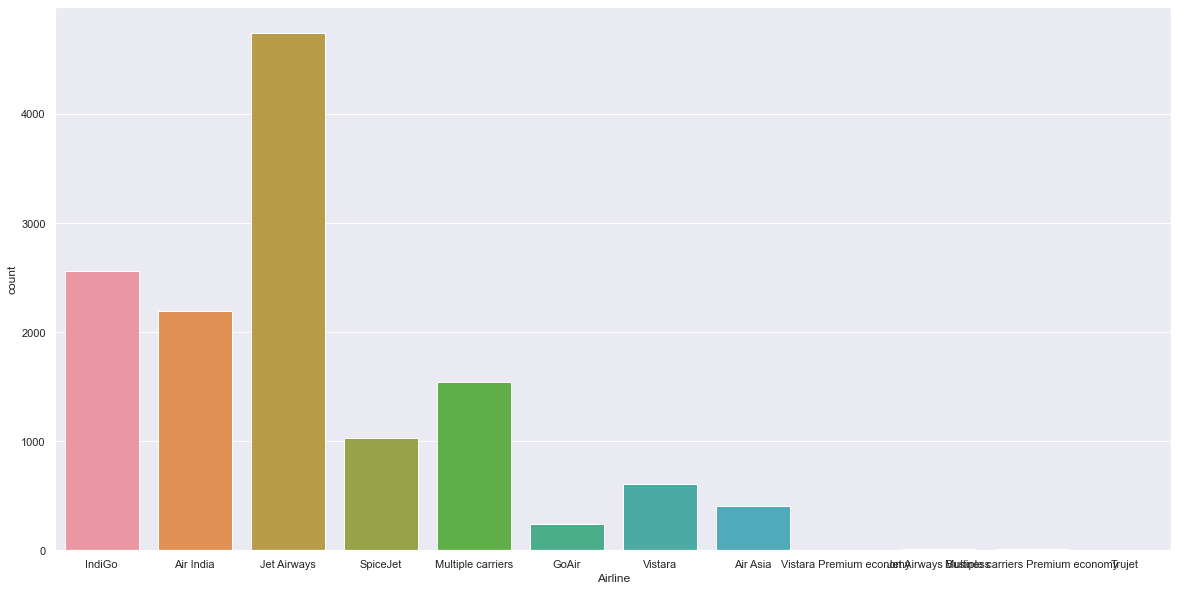

In [279]:
#Analysis of the various airlines 
sn.set(rc={'figure.figsize':(20,10)})
sn.countplot(big_df['Airline'])

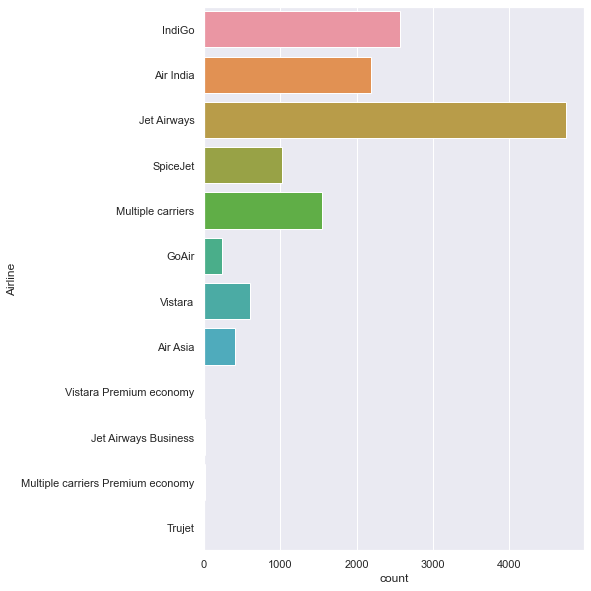

In [280]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sn.countplot(y=big_df['Airline'])
plt.show()

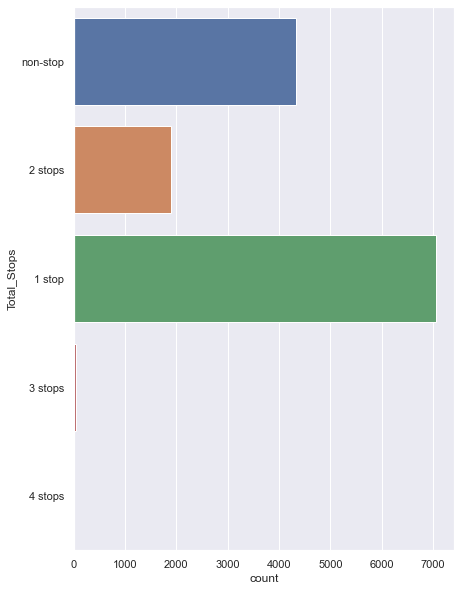

In [281]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sn.countplot(y=big_df['Total_Stops'])
plt.show()         

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

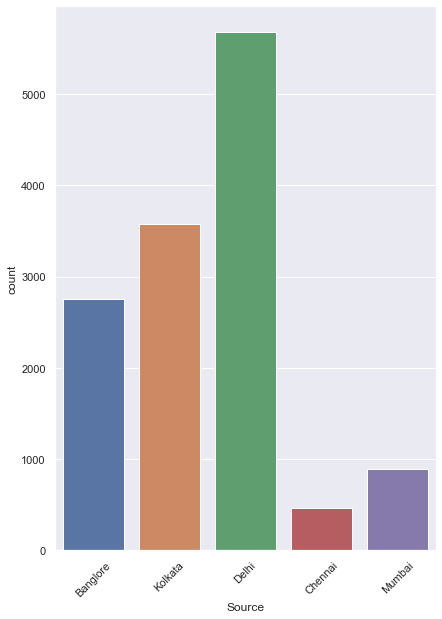

In [282]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sn.countplot(x=big_df['Source'])
plt.xticks(rotation=45)

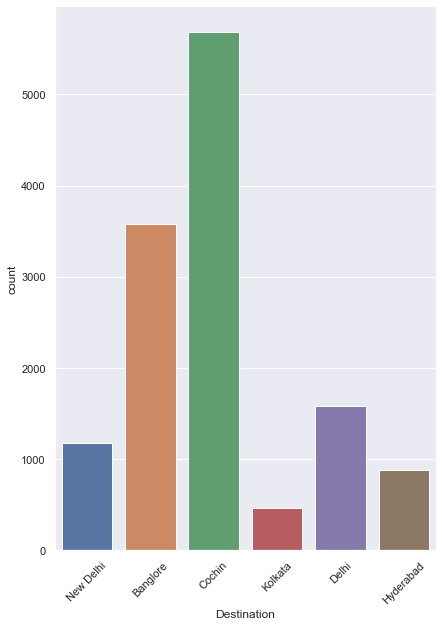

In [283]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,2)
sn.countplot(x=big_df['Destination'])
plt.xticks(rotation=45)
plt.show()

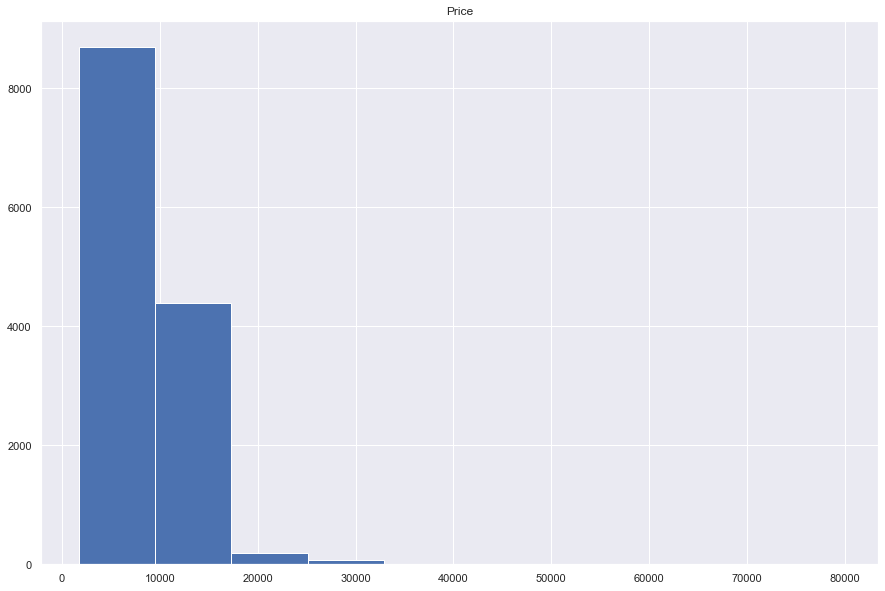

In [284]:
big_df.hist(figsize=(15,10))
plt.show()

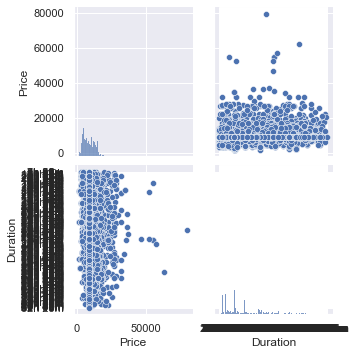

In [285]:
sn.pairplot(data=big_df,vars=['Price','Duration'])

# Data Cleaning

In [286]:
big_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.000000
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.000000
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.000000
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.000000
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.000000
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,9087.064121
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,9087.064121
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,9087.064121
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,9087.064121


In [287]:
big_df['Date'] = big_df['Date_of_Journey'].str.split('/').str[0]
big_df['Month'] = big_df['Date_of_Journey'].str.split('/').str[1]
big_df['Year'] = big_df['Date_of_Journey'].str.split('/').str[2]

In [288]:
big_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.000000,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.000000,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.000000,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.000000,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.000000,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,9087.064121,6,06,2019
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,9087.064121,27,03,2019
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,9087.064121,6,03,2019
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,9087.064121,6,03,2019


In [289]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [290]:
big_df['Date'] = big_df['Date'].astype(int)
big_df['Month'] = big_df['Month'].astype(int)
big_df['Year'] = big_df['Year'].astype(int)

In [291]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [292]:
big_df=big_df.drop(['Date_of_Journey'], axis=1)

In [293]:
big_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.000000,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.000000,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.000000,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.000000,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.000000,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,9087.064121,6,6,2019
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,9087.064121,27,3,2019
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,9087.064121,6,3,2019
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,9087.064121,6,3,2019


In [294]:
big_df['Arrival_Time'] = big_df['Arrival_Time'] .str.split(' ').str[0]

In [295]:
big_df[big_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year


In [296]:
big_df['Total_Stops']=big_df['Total_Stops'].fillna('1 stop')

In [297]:
big_df['Total_Stops']=big_df['Total_Stops'].replace('non-stop','0 stop')

In [298]:
big_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.000000,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.000000,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.000000,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.000000,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.000000,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25,23h 55m,1 stop,No info,9087.064121,6,6,2019
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,0 stop,No info,9087.064121,27,3,2019
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25,6h 35m,1 stop,No info,9087.064121,6,3,2019
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,9087.064121,6,3,2019


In [299]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [300]:
big_df['Stop'] = big_df['Total_Stops'].str.split(' ').str[0]

In [301]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [302]:
big_df['Stop']=big_df['Stop'].astype(int)
big_df=big_df.drop(['Total_Stops'],axis=1)

In [303]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stop                 int32
dtype: object

In [304]:
big_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.000000,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.000000,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.000000,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.000000,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.000000,1,3,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25,23h 55m,No info,9087.064121,6,6,2019,1
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,No info,9087.064121,27,3,2019,0
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25,6h 35m,No info,9087.064121,6,3,2019,1
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,No info,9087.064121,6,3,2019,1


In [305]:
big_df['Arrival_Hour'] = big_df['Arrival_Time'] .str.split(':').str[0]
big_df['Arrival_Minute'] = big_df['Arrival_Time'] .str.split(':').str[1]

big_df['Arrival_Hour'] = big_df['Arrival_Hour'].astype(int)
big_df['Arrival_Minute'] = big_df['Arrival_Minute'].astype(int)
big_df=big_df.drop(['Arrival_Time'], axis=1)

In [306]:
big_df

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.000000,24,3,2019,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.000000,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.000000,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.000000,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.000000,1,3,2019,1,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,23h 55m,No info,9087.064121,6,6,2019,1,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,2h 35m,No info,9087.064121,27,3,2019,0,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,6h 35m,No info,9087.064121,6,3,2019,1,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,15h 15m,No info,9087.064121,6,3,2019,1,19,15


In [307]:
big_df['Dep_Hour'] = big_df['Dep_Time'] .str.split(':').str[0]
big_df['Dep_Minute'] = big_df['Dep_Time'] .str.split(':').str[1]
big_df['Dep_Hour'] = big_df['Dep_Hour'].astype(int)
big_df['Dep_Minute'] = big_df['Dep_Minute'].astype(int)
big_df=big_df.drop(['Dep_Time'], axis=1)

In [308]:
big_df

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.000000,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.000000,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.000000,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.000000,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.000000,1,3,2019,1,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,No info,9087.064121,6,6,2019,1,20,25,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,No info,9087.064121,27,3,2019,0,16,55,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,No info,9087.064121,6,3,2019,1,4,25,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,No info,9087.064121,6,3,2019,1,19,15,4,0


In [309]:
big_df['Route_1'] = big_df['Route'] .str.split('→ ').str[0]
big_df['Route_2'] = big_df['Route'] .str.split('→ ').str[1]
big_df['Route_3'] = big_df['Route'] .str.split('→ ').str[2]
big_df['Route_4'] = big_df['Route'] .str.split('→ ').str[3]
big_df['Route_5'] = big_df['Route'] .str.split('→ ').str[4]

In [310]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [311]:
big_df['Route_1'].fillna("None",inplace = True)
big_df['Route_2'].fillna("None",inplace = True)
big_df['Route_3'].fillna("None",inplace = True)
big_df['Route_4'].fillna("None",inplace = True)
big_df['Route_5'].fillna("None",inplace = True)

In [312]:
big_df

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.000000,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.000000,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.000000,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.000000,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.000000,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,No info,9087.064121,6,6,2019,1,20,25,20,30,CCU,DEL,BLR,None,None
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,No info,9087.064121,27,3,2019,0,16,55,14,20,CCU,BLR,None,None,None
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,No info,9087.064121,6,3,2019,1,4,25,21,50,DEL,BOM,COK,None,None
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,No info,9087.064121,6,3,2019,1,19,15,4,0,DEL,BOM,COK,None,None


In [313]:
big_df=big_df.drop(['Route'],axis=1)
big_df=big_df.drop(['Duration'],axis=1)

In [314]:
big_df.isnull().sum()

Airline            0
Source             0
Destination        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Stop               0
Arrival_Hour       0
Arrival_Minute     0
Dep_Hour           0
Dep_Minute         0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [315]:
big_df

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.000000,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.000000,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.000000,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.000000,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.000000,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,No info,9087.064121,6,6,2019,1,20,25,20,30,CCU,DEL,BLR,None,None
2667,IndiGo,Kolkata,Banglore,No info,9087.064121,27,3,2019,0,16,55,14,20,CCU,BLR,None,None,None
2668,Jet Airways,Delhi,Cochin,No info,9087.064121,6,3,2019,1,4,25,21,50,DEL,BOM,COK,None,None
2669,Air India,Delhi,Cochin,No info,9087.064121,6,3,2019,1,19,15,4,0,DEL,BOM,COK,None,None


# Converting the Categorical into integer variable

In [316]:
from sklearn.preprocessing import LabelEncoder

lb_encode = LabelEncoder()
big_df["Additional_Info"] = lb_encode.fit_transform(big_df["Additional_Info"])
big_df["Airline"] = lb_encode.fit_transform(big_df["Airline"])
big_df["Destination"] = lb_encode.fit_transform(big_df["Destination"])
big_df["Source"] = lb_encode.fit_transform(big_df["Source"])
big_df['Route_1']= lb_encode.fit_transform(big_df["Route_1"])
big_df['Route_2']= lb_encode.fit_transform(big_df["Route_2"])
big_df['Route_3']= lb_encode.fit_transform(big_df["Route_3"])
big_df['Route_4']= lb_encode.fit_transform(big_df["Route_4"])
big_df['Route_5']= lb_encode.fit_transform(big_df["Route_5"])

In [317]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns  

In [318]:
missing_values_table(big_df)

Your selected dataframe has 18 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# Checking the Outliers

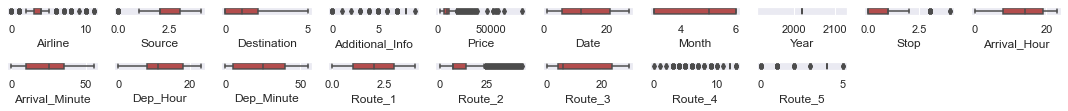

In [319]:
collist=big_df.columns.values
ncol=10
nrows=20
plt.figure(figsize=(15,15))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sn.boxplot(big_df[collist[i]],color ='red',saturation = 0.4)
    plt.tight_layout()

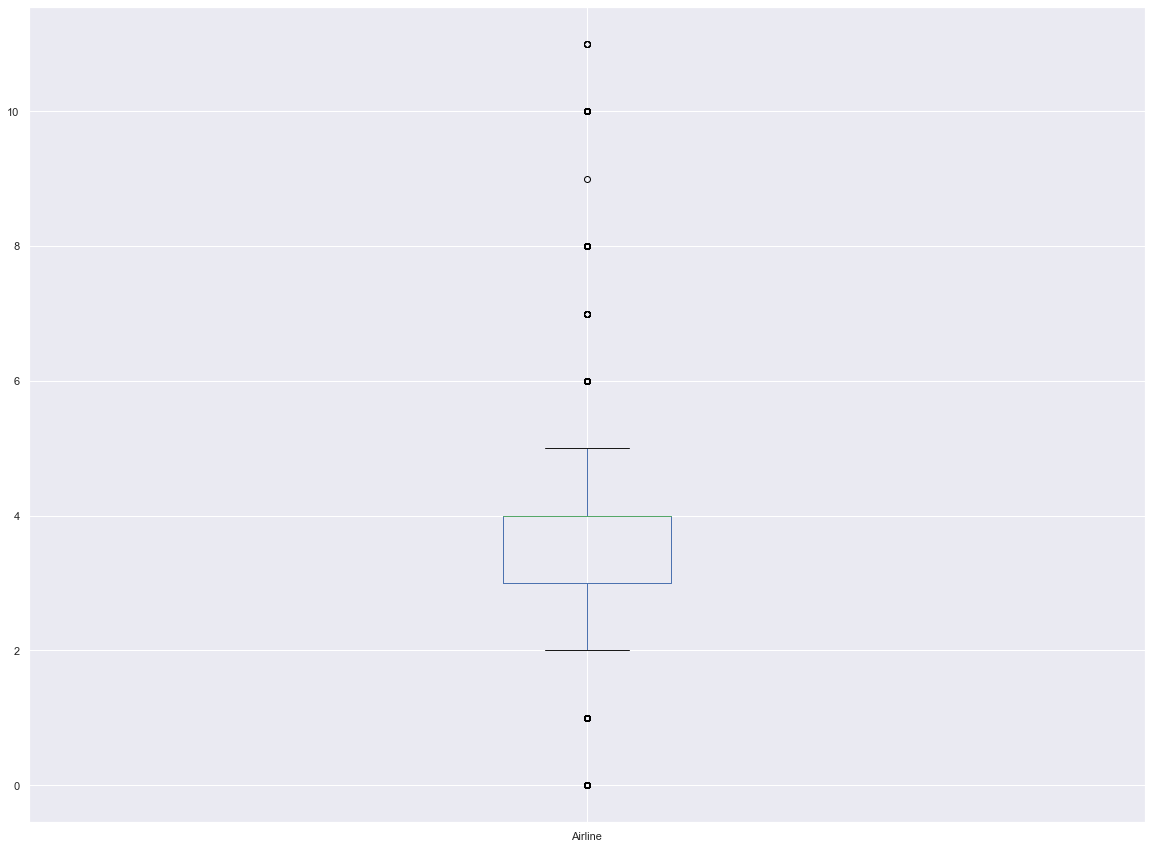

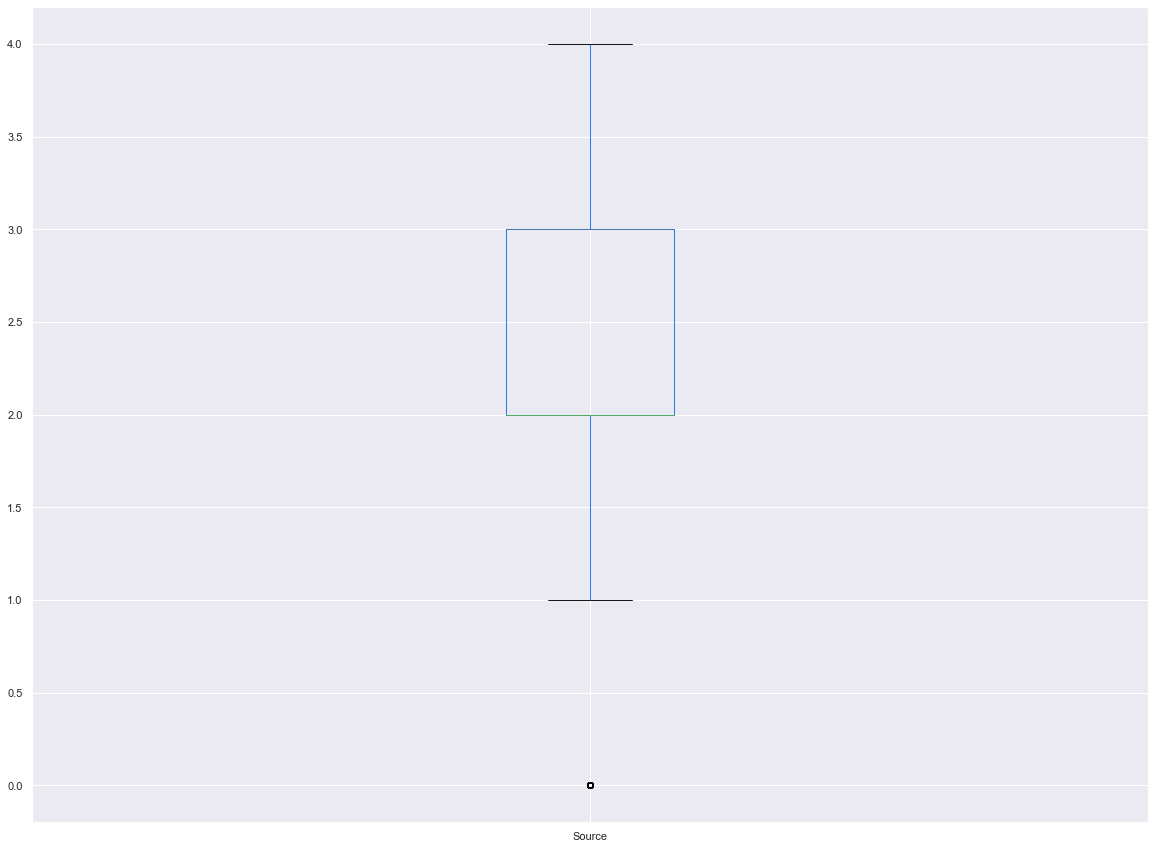

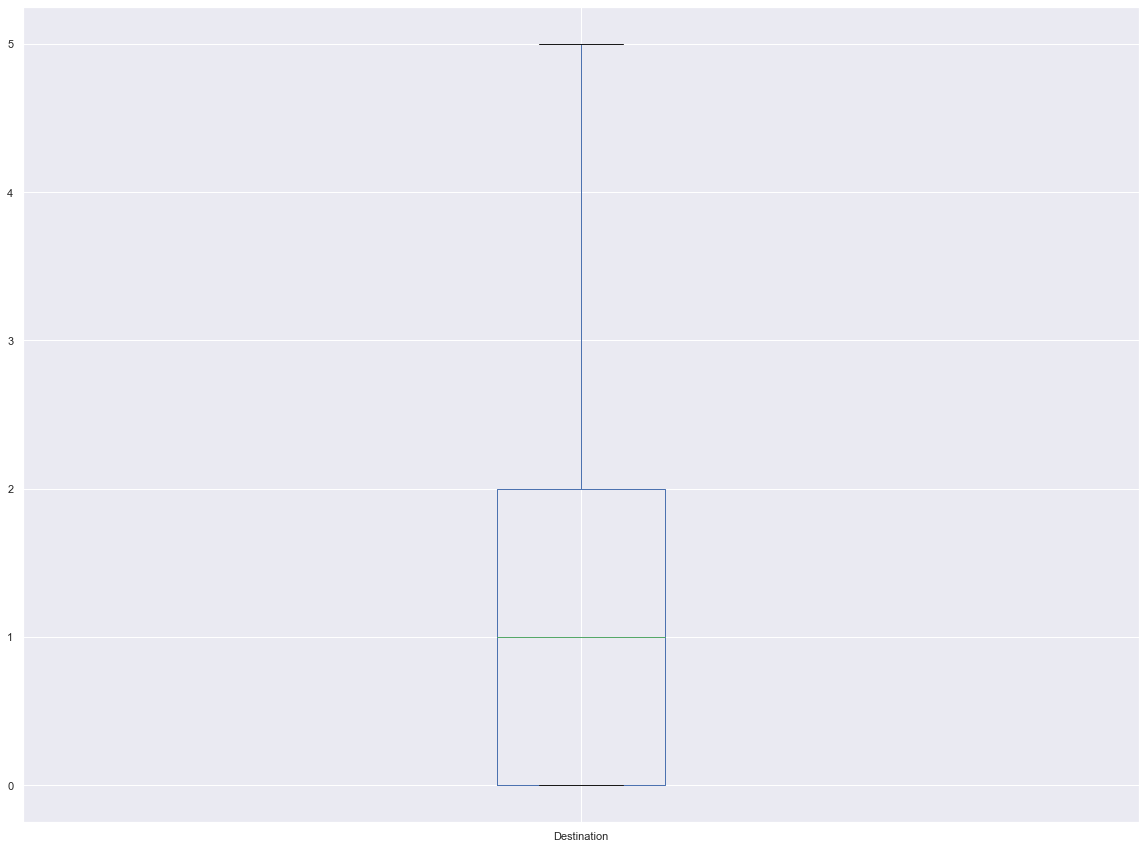

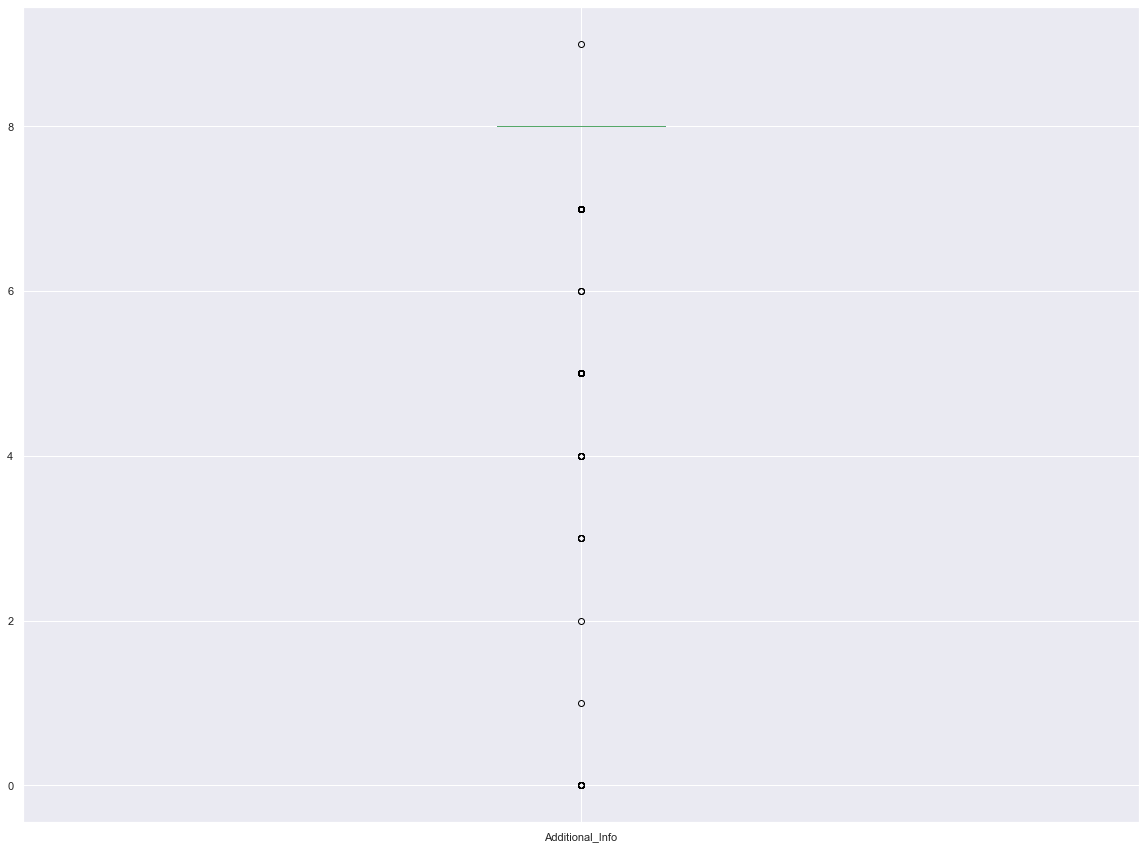

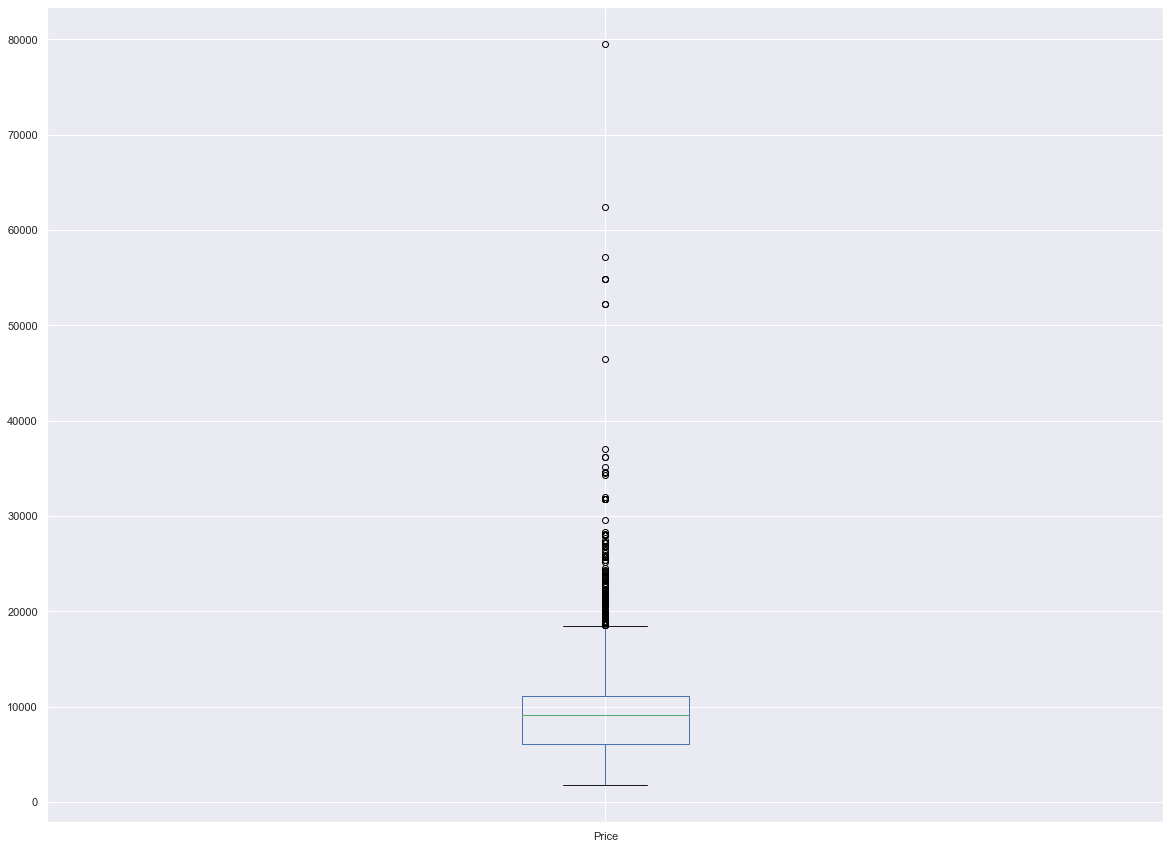

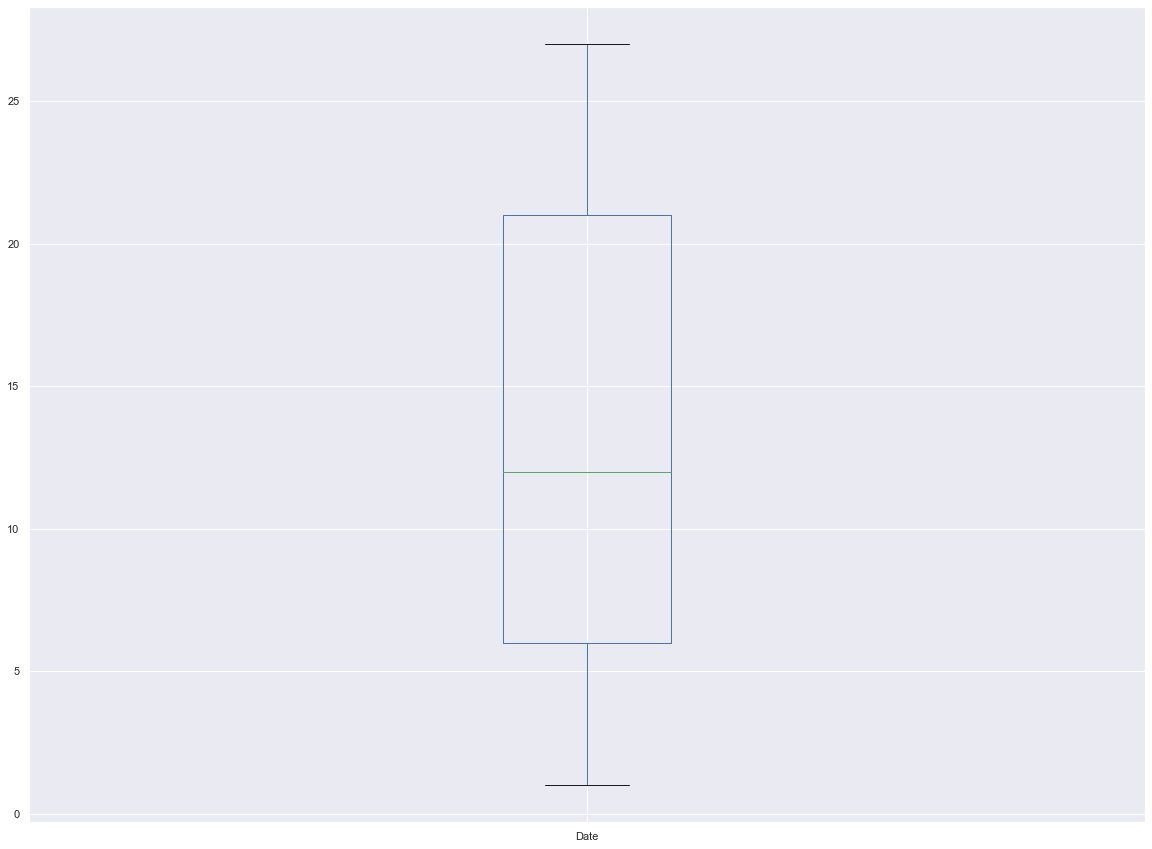

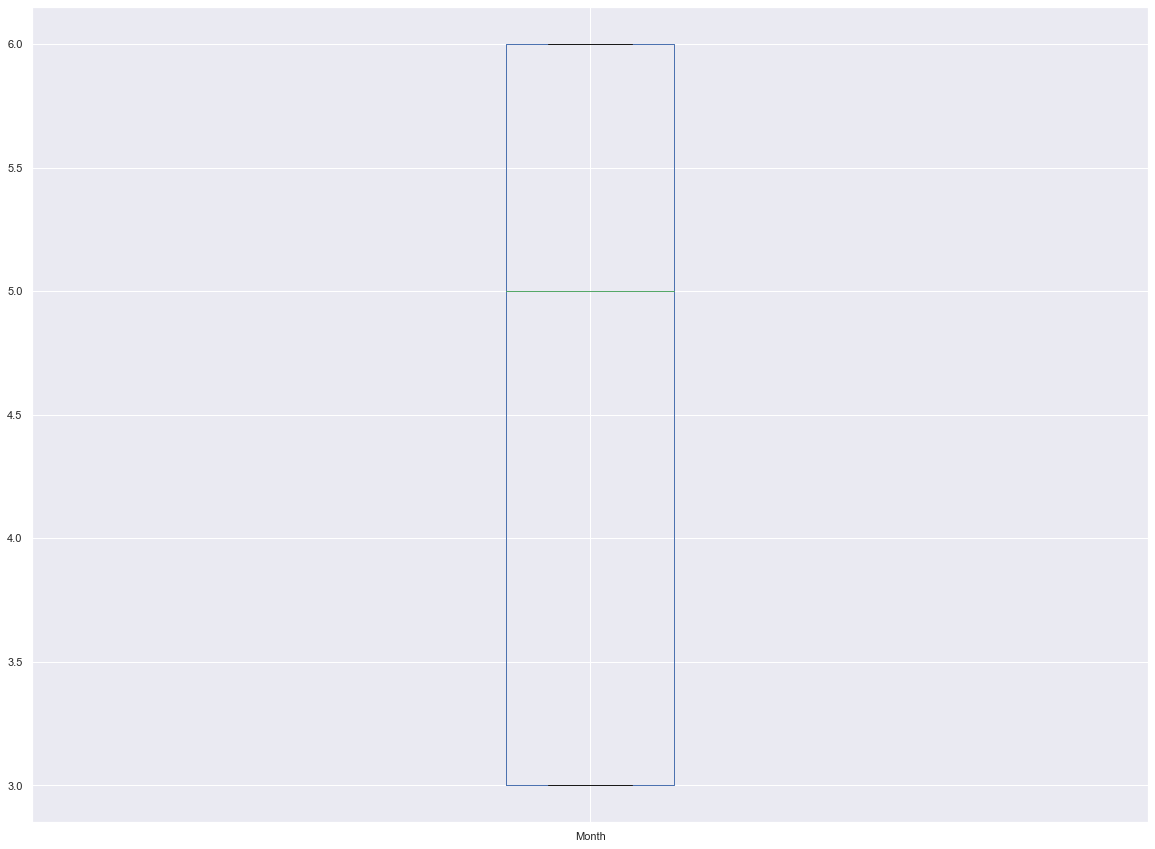

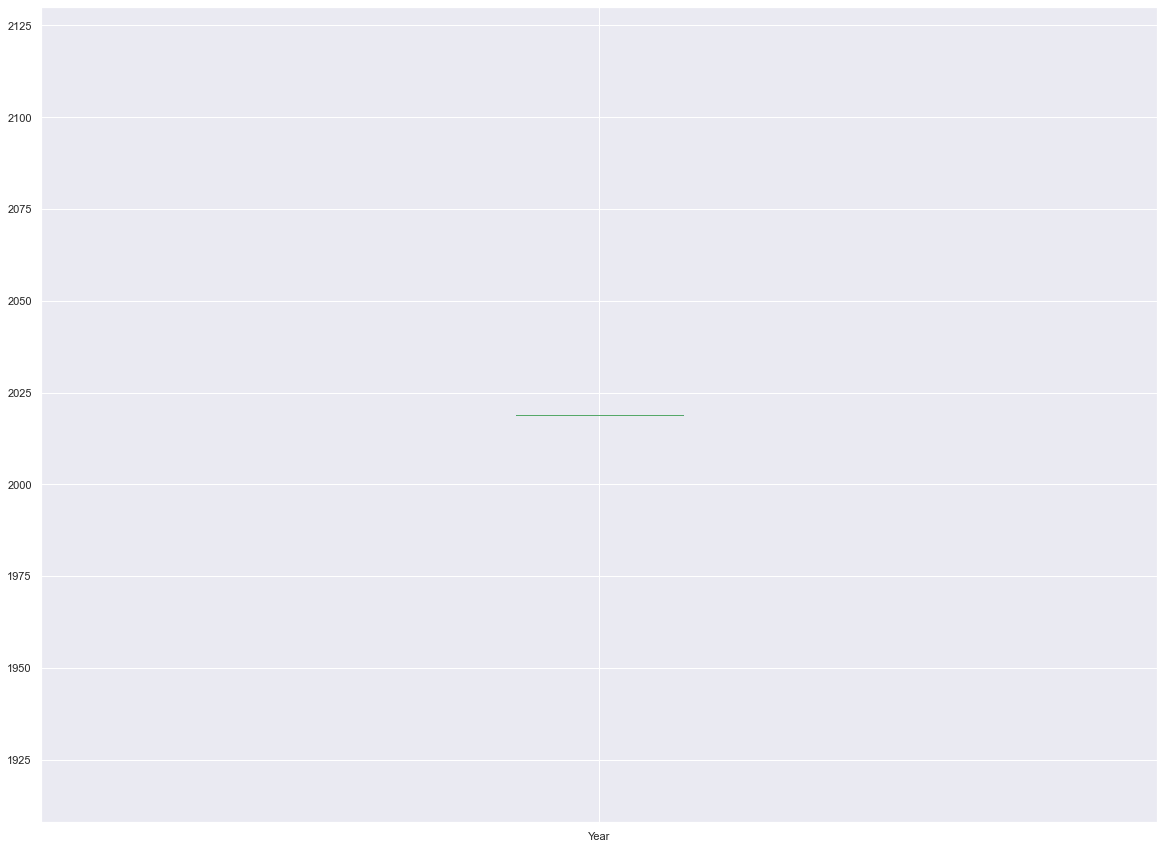

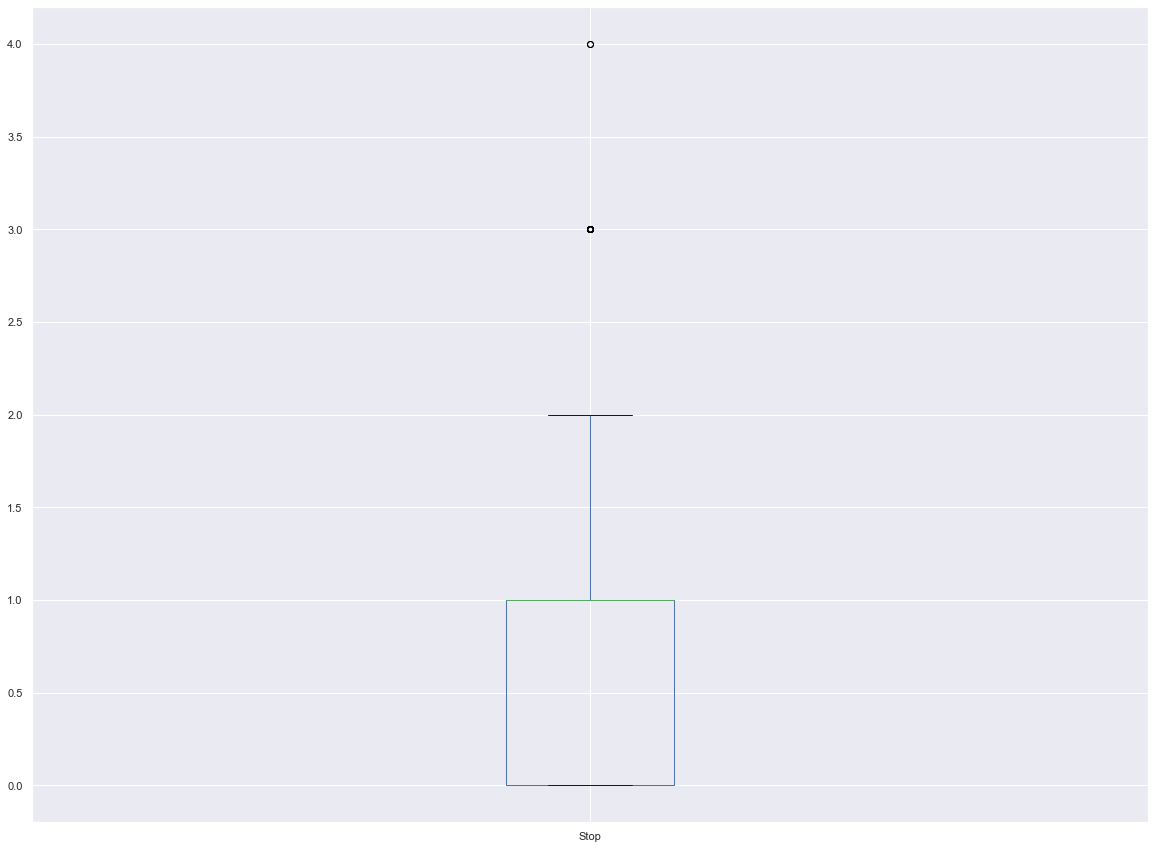

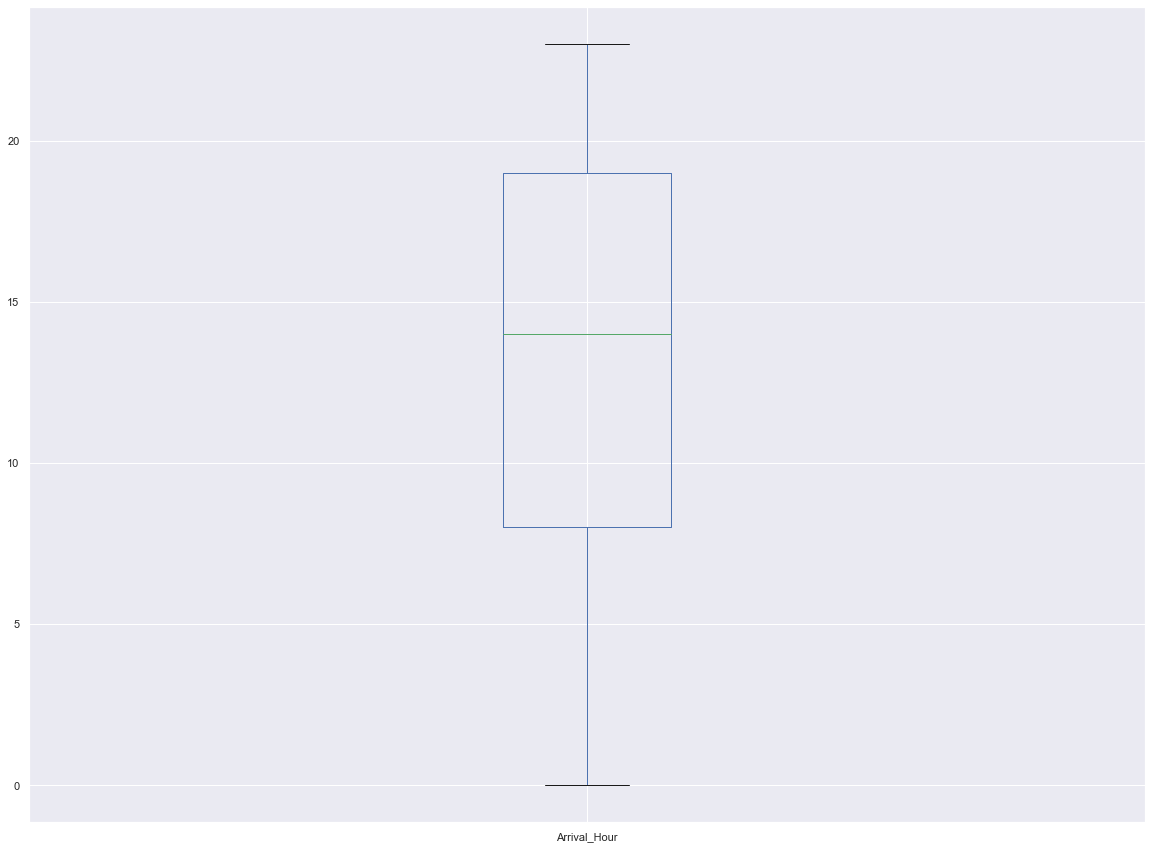

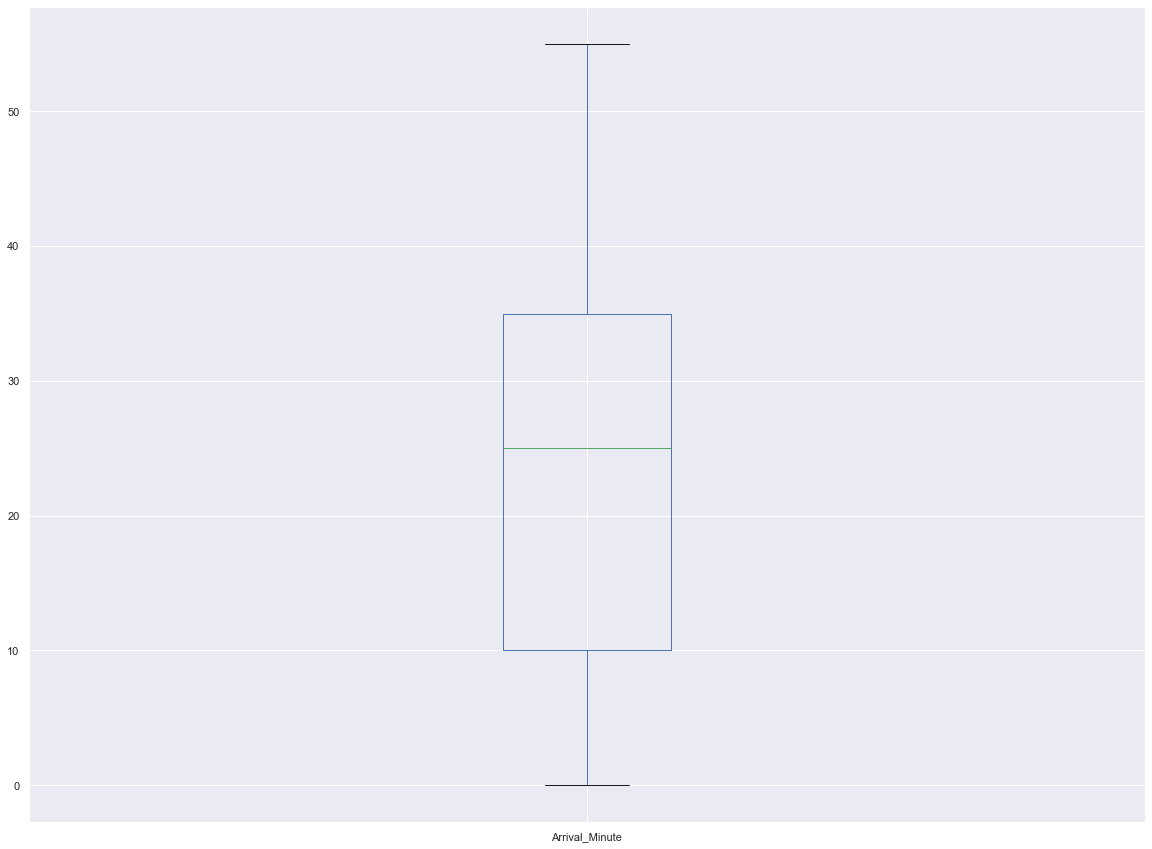

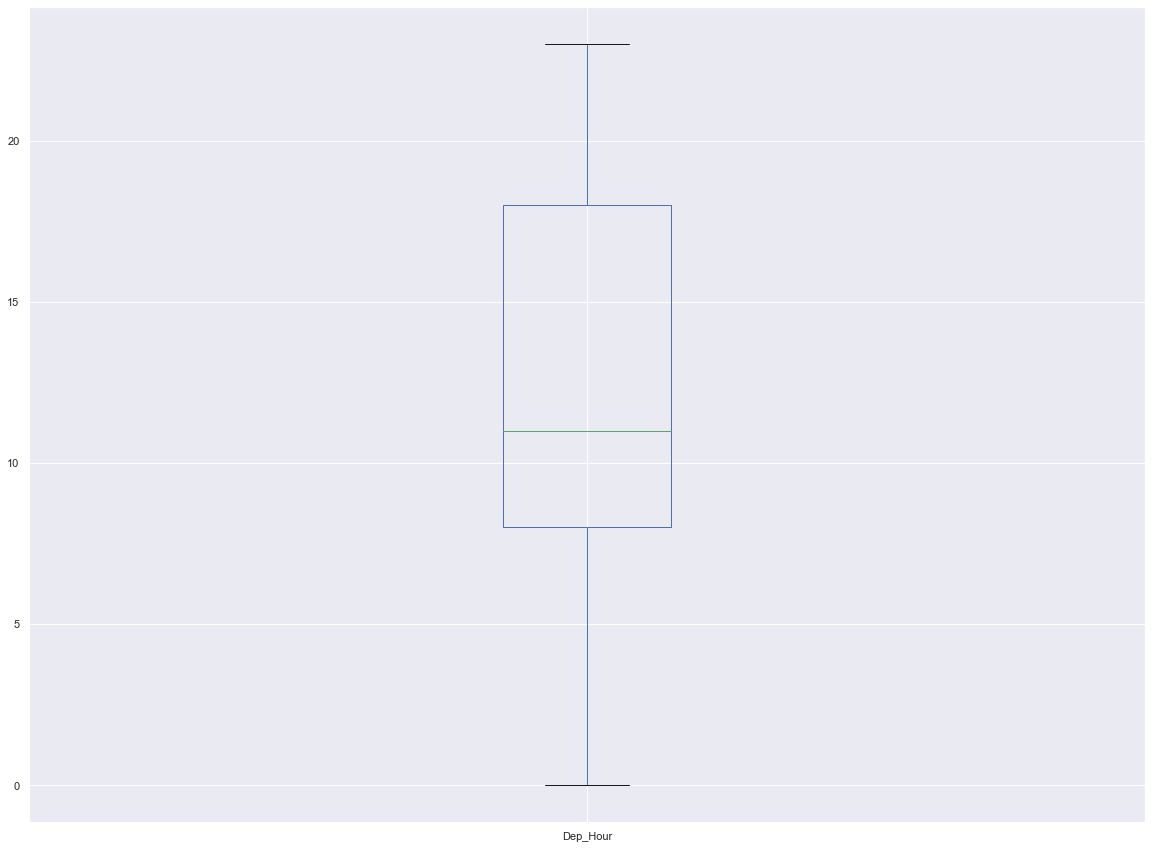

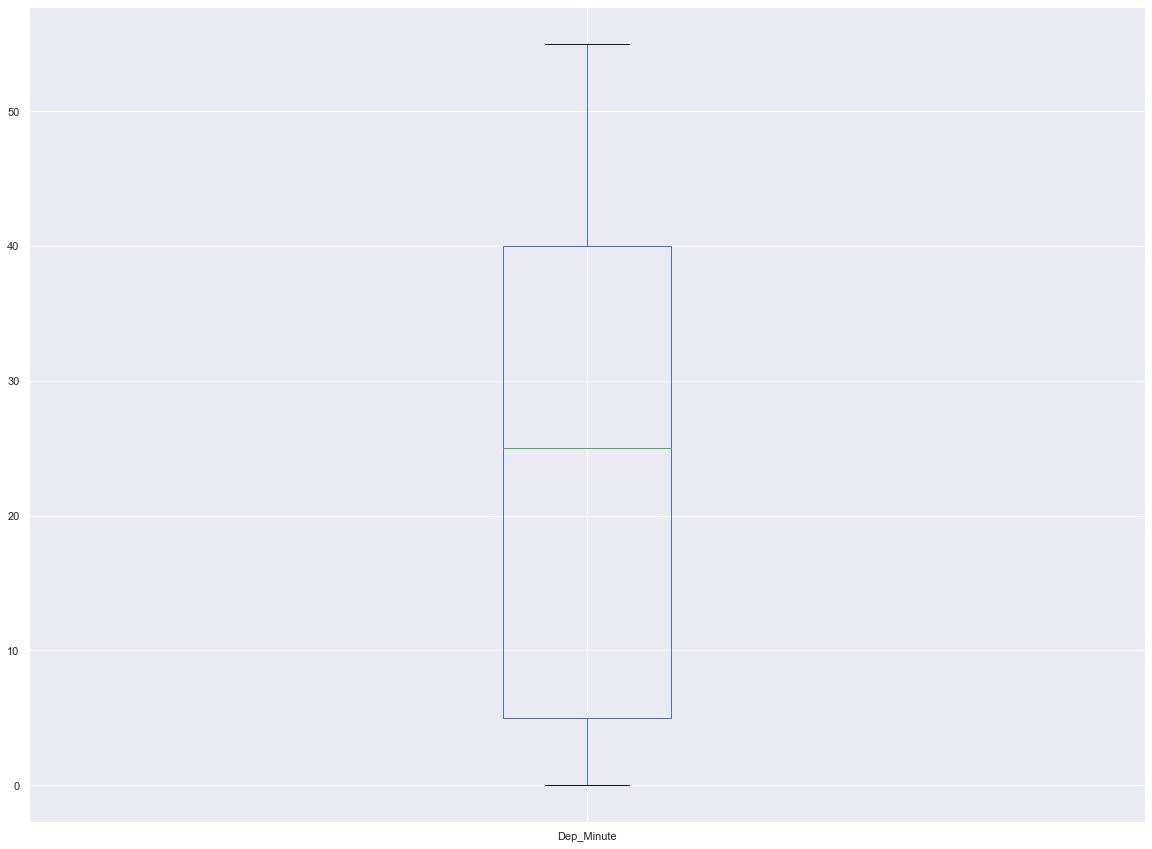

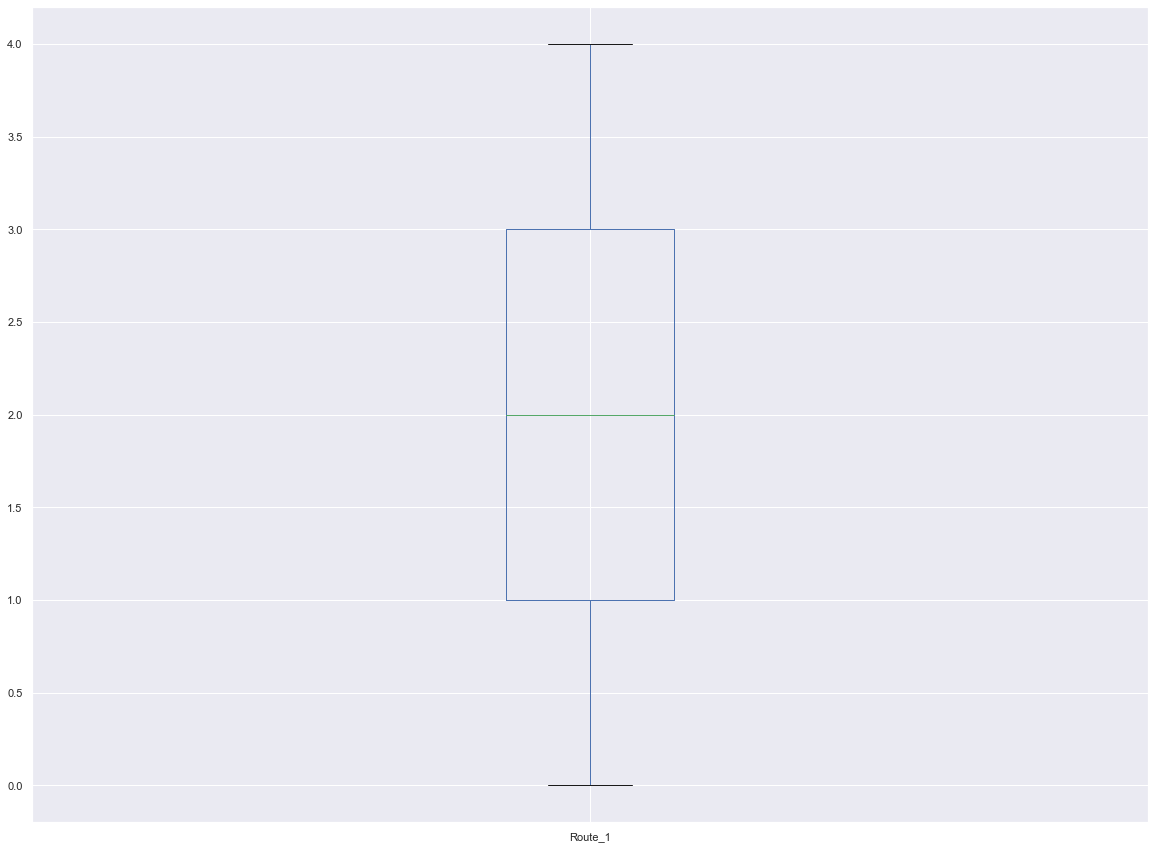

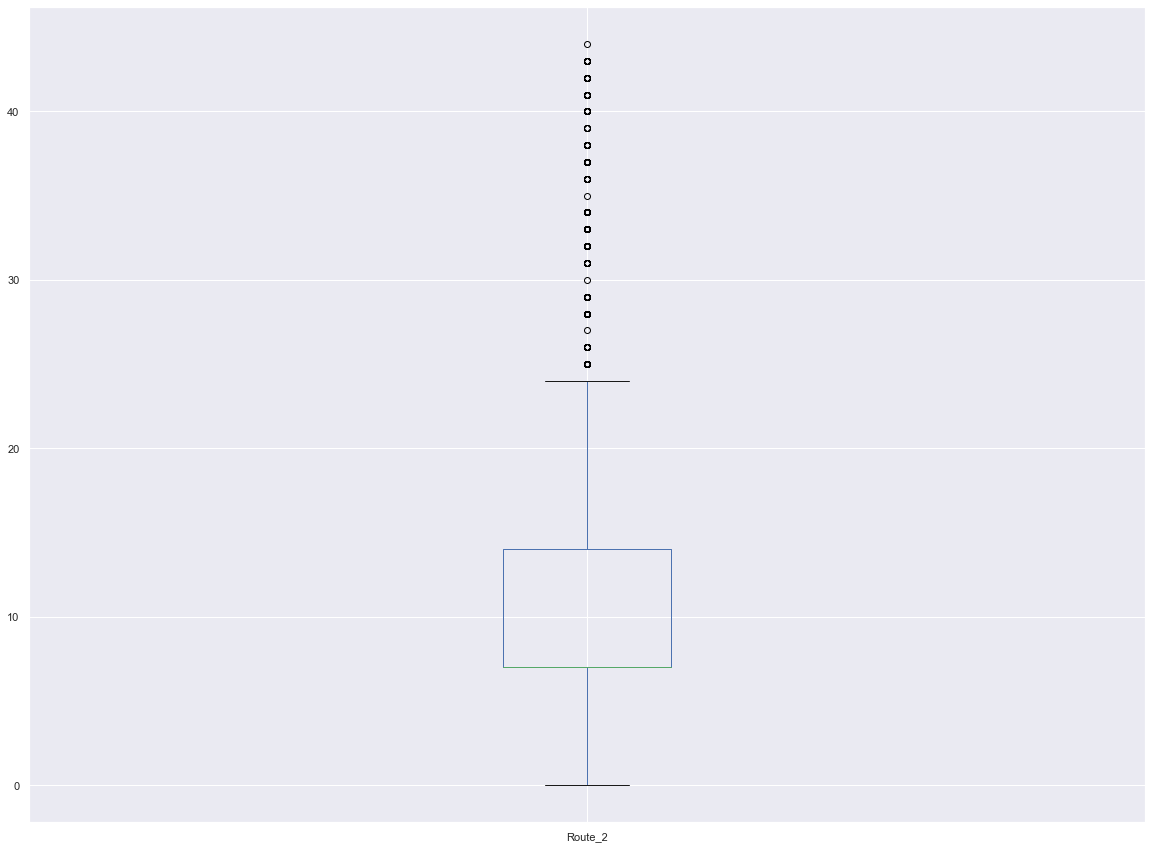

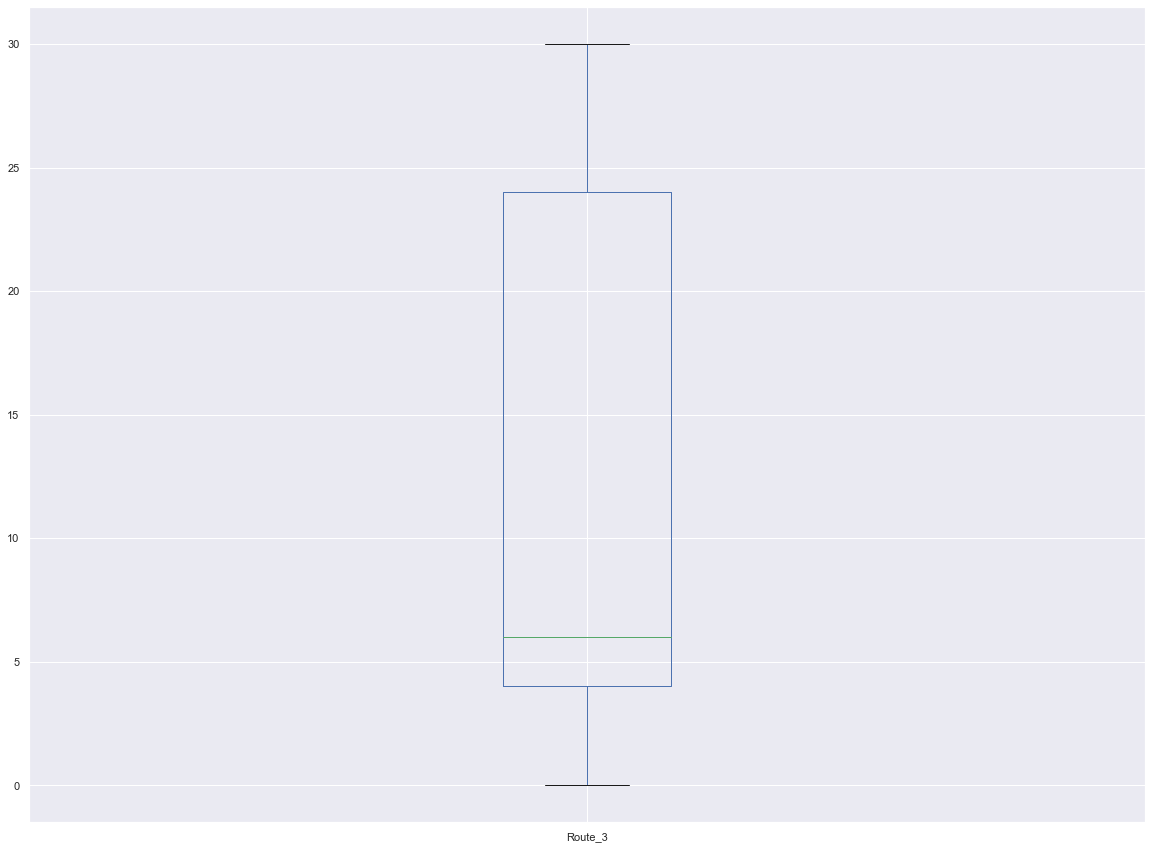

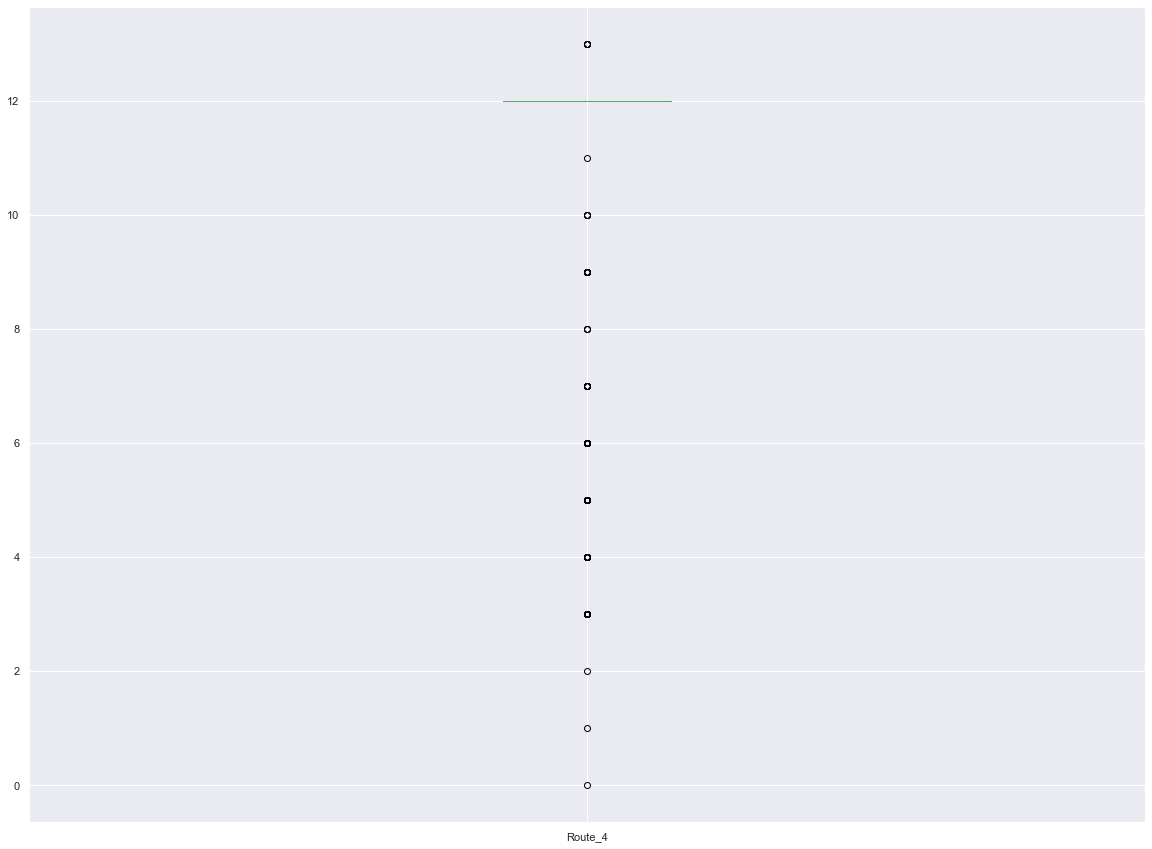

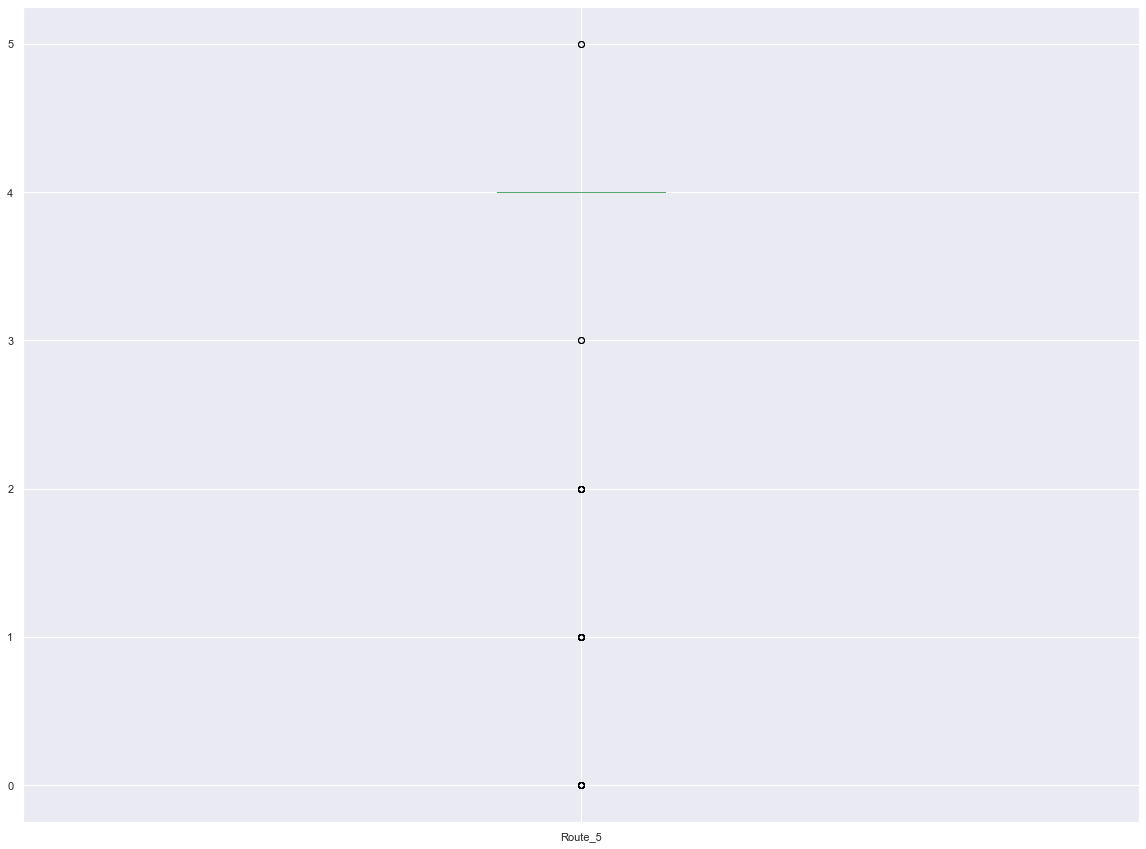

In [320]:
for i in big_df:
    plt.figure(figsize = (20, 15))
    big_df[i].plot.box()

# Removing the Outliers

In [365]:
from scipy.stats import zscore

feature = big_df
z=np.abs(zscore(feature))

z

array([[0.41333477, 1.65803232, 2.41941194, ..., 1.3758073 , 0.40803499,
        0.0621975 ],
       [1.25939127, 0.88743964, 0.97430112, ..., 1.16999901, 3.05011979,
        0.0621975 ],
       [0.00969347, 0.03894899, 0.29555851, ..., 0.83793732, 2.28164095,
        0.0621975 ],
       ...,
       [0.00969347, 0.03894899, 0.29555851, ..., 0.61656285, 0.40803499,
        0.0621975 ],
       [1.25939127, 0.03894899, 0.29555851, ..., 0.61656285, 0.40803499,
        0.0621975 ],
       [0.85574997, 0.03894899, 0.29555851, ..., 0.61656285, 0.40803499,
        0.0621975 ]])

In [322]:
# Creating new dataframe
new_big_df = big_df[(z<3).all(axis=1)] 
new_big_df

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5


In [323]:
print(big_df.shape)

#df dataframe without outliers
print(new_big_df.shape)

(13354, 18)
(0, 18)


In [324]:
big_df

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.000000,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.000000,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.000000,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.000000,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.000000,1,3,2019,1,21,35,16,50,0,34,8,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,8,9087.064121,6,6,2019,1,20,25,20,30,2,14,3,12,4
2667,3,3,0,8,9087.064121,27,3,2019,0,16,55,14,20,2,5,24,12,4
2668,4,2,1,8,9087.064121,6,3,2019,1,4,25,21,50,3,7,6,12,4
2669,1,2,1,8,9087.064121,6,3,2019,1,19,15,4,0,3,7,6,12,4


# Train-Test Split

In [325]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [326]:
big_df.shape

(13354, 18)

In [327]:
df_train = big_df[0:10683]
df_test = big_df[10683:]
df_test = df_test.drop(['Price'], axis =1)

In [328]:
X = df_train.drop(['Price'], axis=1)
y = df_train.Price

In [330]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [331]:
X_train.shape

(7478, 17)

In [332]:
X_test.shape

(3205, 17)

In [333]:
y_train.shape

(7478,)

In [334]:
y_test.shape

(3205,)

# Cross Validation

In [335]:
from sklearn.model_selection import cross_val_score

#function declaration
def cross_validation(reg_model,X,y):
    
    score=cross_val_score(reg_model,X,y,scoring='neg_mean_squared_error',cv=10)
    rmse_score=np.sqrt(-score)
    print("\nScores ",rmse_score)
    print("Mean ",rmse_score.mean())
    print("Standard Deviation ",rmse_score.std())

# Linear Regression Model

In [336]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

#cross validation function call
cross_validation(reg,X_train,y_train)
pd.DataFrame({'Price':y_test,'Price Predicted':y_pred}).head(10)

3228.196219797109

Scores  [2976.66292815 3351.65293316 2891.67367289 3451.69586922 2933.21991027
 2916.159973   3260.37881569 3914.62526706 4151.32947265 2955.58293043]
Mean  3280.2981772518115
Standard Deviation  423.9876344920936


,Price,Price Predicted
6041,3597.0,4035.183024
5637,3383.0,6033.621846
9644,2050.0,3454.780183
3159,4423.0,4601.487855
5278,3597.0,6384.290422
7354,10844.0,9768.249560
10183,13227.0,12811.153995
10297,3100.0,2946.312528
8316,7198.0,10684.549591
462,4957.0,10787.563084


# SVR

In [337]:
from sklearn.svm import SVR

reg=SVR(kernel='linear')
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

#cross validation function call
cross_validation(reg,X_train,y_train)
pd.DataFrame({'Price':y_test,'Price Predicted':y_pred}).head(10)

3356.522464492258

Scores  [3068.95092322 3522.10359215 2986.29067021 3686.27400661 3095.0745856
 3030.03505271 3458.35184337 4077.03266642 4284.26145626 3080.37841365]
Mean  3428.8753210184245
Standard Deviation  441.01940709029185


,Price,Price Predicted
6041,3597.0,4649.307081
5637,3383.0,5200.484229
9644,2050.0,3432.325339
3159,4423.0,4515.354801
5278,3597.0,5446.815977
7354,10844.0,10257.147858
10183,13227.0,12556.282901
10297,3100.0,3301.331264
8316,7198.0,10133.103107
462,4957.0,10284.171672


# KNN method

In [338]:
from sklearn.neighbors import KNeighborsRegressor

reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

#cross validation function call
cross_validation(reg,X_train,y_train)
pd.DataFrame({'Price':y_test,'Price Predicted':y_pred}).head(10)

2625.430787423805

Scores  [2367.79946312 3101.94777267 2381.96272816 3063.60915428 2471.73752965
 2323.48150244 2773.40233022 3375.08846263 3478.97182311 2596.78187615]
Mean  2793.478264244268
Standard Deviation  411.13866569371874


,Price,Price Predicted
6041,3597.0,3526.000000
5637,3383.0,4116.333333
9644,2050.0,3100.000000
3159,4423.0,4103.000000
5278,3597.0,6374.000000
7354,10844.0,13032.000000
10183,13227.0,12124.666667
10297,3100.0,2925.000000
8316,7198.0,13610.333333
462,4957.0,5195.666667


# Gradient boosting Regressor

In [367]:
from sklearn.ensemble import GradientBoostingRegressor

reg=GradientBoostingRegressor(n_estimators=5,learning_rate=1,loss ='ls')
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

#cross validation function call
cross_validation(reg,X_train,y_train)
pd.DataFrame({'Price':y_test,'Price Predicted':y_pred}).head(10)

2221.1205352041334

Scores  [1973.90466126 2654.2443922  2123.47146998 2654.78981278 2123.9884649
 2106.08161307 2415.31920345 2851.75083928 2942.55642423 2039.66072349]
Mean  2388.576760464383
Standard Deviation  343.1288640444773


,Price,Price Predicted
6041,3597.0,4676.659693
5637,3383.0,3719.568054
9644,2050.0,2574.642567
3159,4423.0,5344.737790
5278,3597.0,4092.303807
7354,10844.0,10091.337496
10183,13227.0,12877.750969
10297,3100.0,3500.061467
8316,7198.0,10426.170002
462,4957.0,4871.201491


# Random Forest Regressor

In [341]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [342]:
y_pred =reg_rf.predict(X_test)

In [343]:
reg_rf.score(X_train,y_train)

0.9795839759312648

In [344]:
reg_rf.score(X_test,y_test)

0.9050834651428148

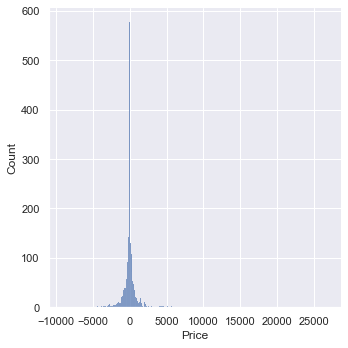

In [346]:
sn.displot(y_test-y_pred)
plt.show()

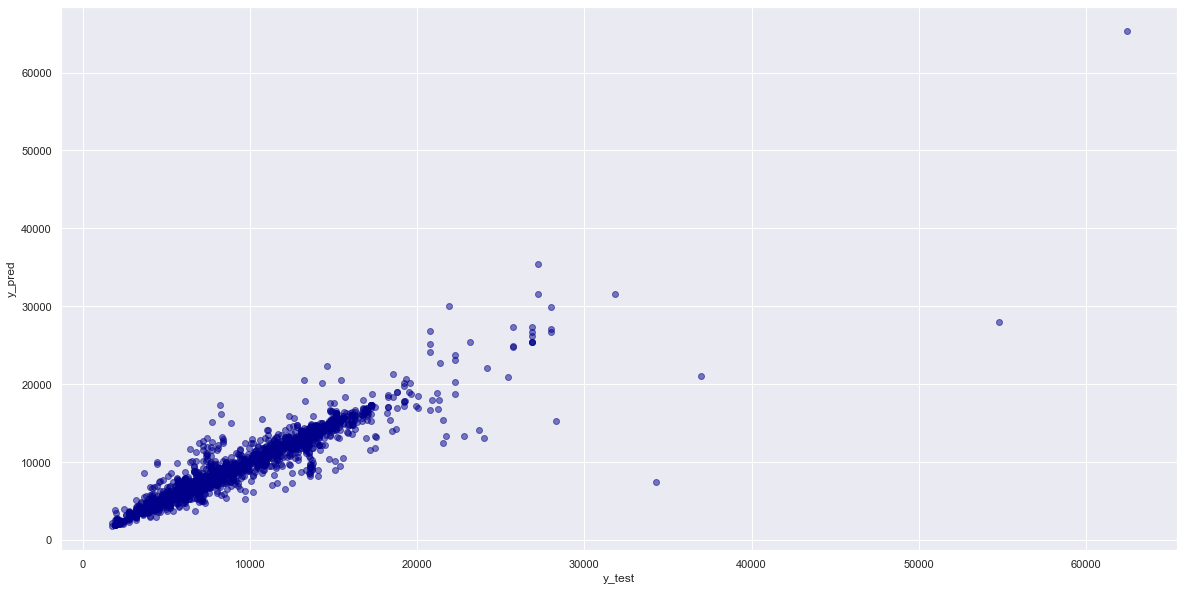

In [347]:
plt.scatter(y_test,y_pred,alpha =0.5,color="DarkBlue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [348]:
from sklearn import metrics

In [349]:
print("MAE:" , metrics.mean_absolute_error(y_test,y_pred))
print("MSE:" , metrics.mean_squared_error(y_test,y_pred))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 603.5141210373178
MSE: 1915440.7640066496
RMSE: 1383.9944956561965


In [350]:
metrics.r2_score(y_test, y_pred)

0.9050834651428148

# Hyperparameter Tuning

In [351]:
from sklearn.model_selection import RandomizedSearchCV

In [352]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [353]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [355]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42)

In [356]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [357]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [358]:
prediction = rf_random.predict(X_test)

<Figure size 576x576 with 0 Axes>

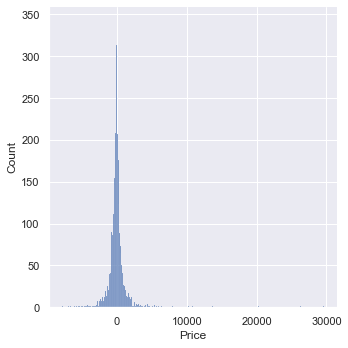

In [360]:
plt.figure(figsize =(8,8))
sn.displot(y_test-prediction)
plt.show()

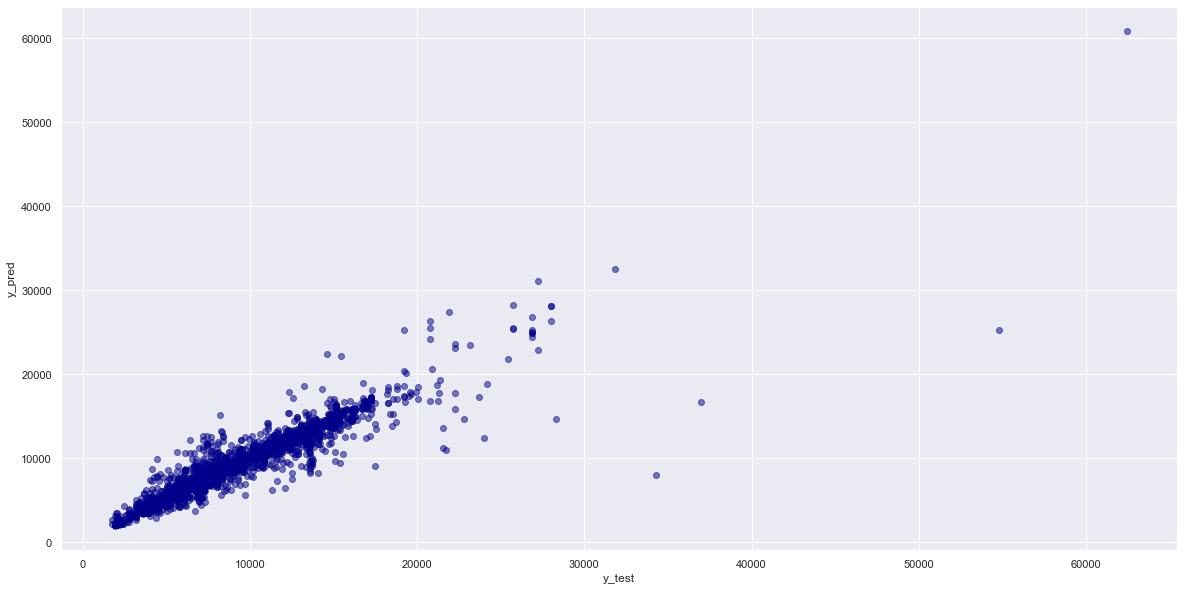

In [361]:
plt.scatter(y_test,prediction,alpha =0.5,color="DarkBlue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [362]:
print("MAE:" , metrics.mean_absolute_error(y_test,prediction))
print("MSE:" , metrics.mean_squared_error(y_test,prediction))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 713.0865712686536
MSE: 2129842.009798321
RMSE: 1459.3978243776853


# Saving the Best Model

In [364]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)